# K-Means

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Diccionario de datos:
df_dicc = pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Docs/metadata_directory/DiccionarioPreguntas.csv', sep=";")

In [4]:
# funcion para consultar posibles valores de una pregunta:
def consultar_dicc(pregunta):
  print (df_dicc[df_dicc['pregunta'] == pregunta])


A partir de FAMD, con base en las 17 componentes, se aplica el modelo de KMeans. Para este caso, se seleccionan 6 clústeres, que corresponden a igual número de estratos socioeconómicos

In [5]:
famd_df = pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Results/R1-FAMD.csv', sep=";")
famd_df = famd_df.drop(['Unnamed: 0'], axis=1)

In [6]:
famd_df.shape

(9040, 17)

In [7]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=6, random_state=0, max_iter=300,tol=1e-04).fit(famd_df)
kmeans.labels_

array([3, 3, 3, ..., 0, 1, 1], dtype=int32)

In [8]:
kmeansdf=pd.DataFrame(kmeans.labels_)

In [9]:
kmeansdf.to_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Other/R3-K-means-labels.csv', sep=';')

Se le asigna a cada observación del archivo sin dummies y sin outliers la clasificación dada por Kmeans

In [10]:
dff=pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Modeling/T2_ECV_sindum_sinout_ord.csv', sep=";")

In [11]:
def forzar_tipos(df, info, estandarizar=0):
  from sklearn.preprocessing import StandardScaler
  list_float = list(info.campo[info['tipo'] == 'float64'])
  list_obj = list(info.campo[info['tipo'] == 'object'])
  list_int =  list(info.campo[info['tipo'] == 'int64'])
  df1 = pd.DataFrame()
  df1[list_obj] = df[list_obj].astype(object)
  df1[list_float] = df[list_float].astype(float) 
  df1[list_int] = df[list_int].astype(int)
  if estandarizar == 1:
    df1[list_float] = StandardScaler().fit_transform(df1[list_float])
  return df1

In [12]:
#Función para forzar tipos, con dummies -> info_condum.csv | sin dummies -> info_sindum.csv
infoTipos = pd.read_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Docs/metadata_directory/info_sindum.csv', sep=';')

In [13]:
dff=forzar_tipos(dff, infoTipos, 1)

In [14]:
dff['kmeans_label']=kmeans.labels_
dff

,p_7,p_10,p_6,p_5,p_146,p_147,p_148,p_158,p_162,p_165,p_171,p_174,p_178,p_184,p_284,p_285,p_286,p_12,p_15a,p_15b,p_19a,p_19b,p_19c,p_19d,p_19e,p_20a,p_20b,p_36a,p_36b,p_44,p_45b,p_45c,p_45d,p_45e,p_45f,p_49b,p_49c,p_66b,p_66c,p_66d,...,p_86b,p_86c,p_86d,p_86e,p_86f,p_86g,p_86h,p_125,p_126,p_157,p_211,p_212,p_213,p_214,p_227,p_232_gp,p_244_ip,p_43a,p_43b,p_43c,p_43d,p_258,p_259,p_260,p_281,p_282,p_283,p_312,p_313,p_314,p_315,p_316,p_317,p_318,p_319,p_320,p_321,p_322,p_323,kmeans_label
0,304,2,3,1,4,10,4,1,1,1,1,1,1,6,14,-88,19,-0.202042,-0.477816,0.171313,-0.487214,-0.545281,1.176202,-0.255870,-0.721117,-0.083529,-0.184167,0.196785,-0.412460,0.987830,0.268579,-0.457982,0.781919,-0.447817,-0.242139,0.299903,-0.591318,0.727262,-0.057021,-0.598352,...,0.187209,-0.172279,-0.446860,-0.135329,-0.126515,-0.06448,-0.410966,-0.071491,-0.037947,-0.293787,0.094721,-0.426427,-0.501031,-0.376490,0.145359,-0.210600,-0.215507,-0.057532,1.331609,-0.326752,-0.518987,2,4,2,4,4,2,2,3,4,4,4,2,4,4,4,5,4,4,3
1,601,2,6,1,4,10,4,1,1,1,1,1,1,6,14,-88,19,-0.844483,-0.477816,-0.741818,-0.487214,-0.545281,0.121354,-0.255870,-0.721117,-0.083529,-1.119487,0.196785,-1.209858,1.010144,0.268579,-0.457982,-0.141591,-0.447817,-0.242139,-0.286793,-0.591318,-1.228546,-0.896546,0.742360,...,-0.895560,-0.172279,1.286881,-0.135329,-0.126515,-0.06448,-0.410966,-0.071491,-0.037947,0.220312,-1.391012,-0.426427,-0.501031,-0.376490,0.088553,-0.053055,-0.225046,-0.057532,1.331609,-0.326752,-0.518987,2,4,2,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,3
2,1606,3,16,1,4,10,4,1,1,1,1,1,1,6,14,-88,19,-0.844483,-1.415604,0.171313,-0.487214,-0.545281,0.121354,-0.255870,-0.721117,-0.083529,-1.119487,0.196785,-1.209858,1.032458,-0.791663,-0.457982,-0.141591,-0.447817,-0.242139,-0.873489,0.417270,-0.250642,-0.896546,0.072004,...,0.187209,-0.172279,-0.446860,-0.135329,-0.126515,-0.06448,-0.410966,-0.071688,-0.038254,-0.293787,0.094721,-0.426427,-0.501031,-0.376490,0.185935,-0.343907,-0.310903,-0.057532,1.331609,-0.326752,-0.518987,1,-98,2,4,4,2,3,3,3,4,4,4,4,4,4,4,4,4,3
3,1014,2,10,1,4,10,4,1,1,1,1,1,1,6,14,-88,19,-0.202042,0.459973,-0.741818,-0.487214,-0.545281,0.121354,0.842972,-0.721117,-0.751762,0.751153,0.196785,-0.412460,1.010144,-0.791663,1.280849,0.781919,-0.447817,-0.242139,0.299903,-0.591318,-0.250642,-0.057021,0.072004,...,0.187209,-0.172279,-0.446860,-0.135329,-0.126515,-0.06448,-0.410966,-0.071491,-0.037947,-0.293787,0.837587,-0.426427,-0.501031,-0.376490,-0.463281,-0.586284,-0.473077,-0.057532,1.331609,-0.326752,-0.518987,2,4,3,4,3,2,4,4,4,4,2,3,4,4,4,4,4,4,3
4,1609,3,16,1,4,10,4,1,1,1,1,1,1,6,14,-88,19,-0.844483,-0.477816,-0.741818,-0.487214,-0.545281,0.121354,-1.354711,0.580060,-0.751762,-0.184167,0.196785,-1.209858,1.010144,-0.791663,-0.457982,-0.141591,-0.447817,-0.242139,-0.873489,0.417270,-0.250642,-0.057021,-0.598352,...,0.187209,-0.172279,-0.446860,-0.135329,-0.126515,-0.06448,-0.410966,-0.071491,-0.037947,0.734411,0.094721,-0.426427,-0.501031,-0.376490,0.835151,-0.053055,-0.017560,-0.057532,1.331609,-0.326752,-0.518987,-98,3,1,4,4,2,4,3,4,4,4,4,4,4,4,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,606,2,6,1,4,10,4,1,1,1,1,1,2,6,7,14,19,2.367723,0.459973,2.910707,2.902098,0.959401,1.176202,0.842972,-0.721117,1.921170,0.751153,1.204110,1.979736,1.032458,2.389062,3.019680,-1.065101,-0.447817,-0.242139,2.059991,-0.591318,-1.228546,-0.896546,4.094143,...,-0.895560,-0.172279,-0.446860,-0.135329,-0.126515,-0.06448,5.103823,-0.071491,-0.037947,-0.293787,-0.648145,-0.426427,-0.501031,-0.376490,0.267087,-0.676310,-0.624689,-0.057532,1.331609,-0.326752,0.766043,-98,-98,3,2,2,3,2,2,2,2,2,3,3,3,3,2,2,4,1
9036,511,3,5,1,5,10,4,1,1,1,2,1,1,6,1,7,4,2.367723,2.335550,1.084445,2.902098,-0.545281,4.340745,-

Se exporta este dataset

In [15]:
dff.to_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Results/R3-K-means.csv', sep=";")

In [16]:
#Ver la relación de las clases con los estratos
pd.crosstab(index=dff["kmeans_label"], 
                           columns=dff["p_10"])

p_10,1,2,3,4,5,6
kmeans_label,,,,,,
0,145,610,502,130,58,15
1,381,795,460,56,28,2
2,150,624,669,207,63,42
3,97,382,430,220,148,167
4,8,52,264,353,430,186
5,307,651,304,60,36,8


De igual manera, se presenta gráficamente la distribución para cada k, de las variables que presentan mayor asociación con las componentes seleccionadas

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

Análisis de algunas variables clave

     pregunta  codigo                                     etiqueta
3642    p_148       1                               Tierra o arena
3643    p_148       2  Madera burda, tabla o tablón u otro vegetal
3644    p_148       3                           Cemento o gravilla
3645    p_148       4          Baldosa, vinilo, tableta o ladrillo
3646    p_148       5                                       Mármol
3647    p_148       6      Madera pulida y lacada, parqué, cristal
3648    p_148       7          Alfombra o tapete de pared a pared.


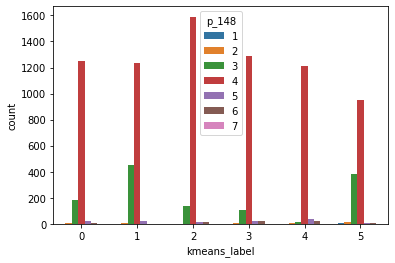

In [18]:
#p_148	¿Cuál es el material predominante de los pisos?
consultar_dicc('p_148')
ax = sns.countplot(x="kmeans_label", hue="p_148", data=dff)

     pregunta  codigo                                           etiqueta
3750    p_184       1                        No tiene servicio sanitario
3751    p_184       2                                            Bajamar
3752    p_184       3                                            Letrina
3753    p_184       4  Inodoro sin conexión a alcantarillado o pozo s...
3754    p_184       5                   Inodoro conectado a pozo séptico
3755    p_184       6                 Inodoro conectado a alcantarillado


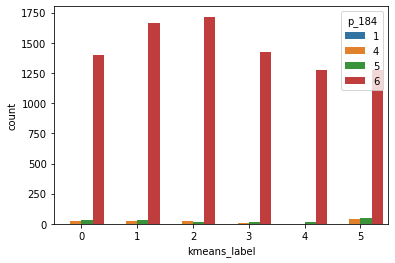

In [19]:
#p_184	Con qué tipo de servicio sanitario cuenta el hogar?
consultar_dicc('p_184')
ax = sns.countplot(x="kmeans_label", hue="p_184", data=dff)

     pregunta  codigo etiqueta
3680    p_165       1       Si
3681    p_165       2       No


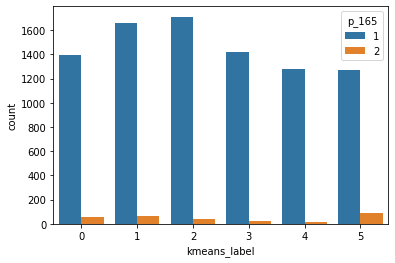

In [20]:
#p_165	La unidad de vivienda cuenta con servicios públicos de:  ALCANTARILLADO
consultar_dicc('p_165')
ax = sns.countplot(x="kmeans_label", hue="p_165", data=dff)

     pregunta  codigo                                           etiqueta
3631    p_147       1  Materiales de desechos y otros (zinc, tela, lo...
3632    p_147       2                                       Madera burda
3633    p_147       3  Bahareque sin revocar, guadua o caña, esterill...
3634    p_147       4                                 Bahareque revocado
3635    p_147       5                                       Tapia pisada
3636    p_147       6                    Material prefabricado, Dry wall
3637    p_147       7  Ladrillo - bloque - adobe sin ranurar, sin rev...
3638    p_147       8                        Bloque  ranurado o revitado
3639    p_147       9                       Ladrillo ranurado o revitado
3640    p_147      10       Ladrillo - bloque - adobe revocado o pintado
3641    p_147      11       Ladrillo - bloque forrado en piedra o madera


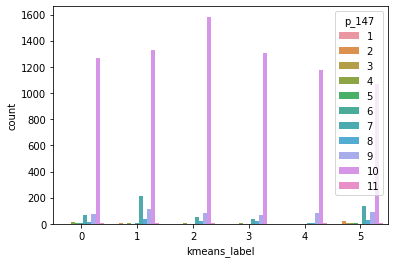

In [21]:
#p_147	¿Cuál es el material predominante de las paredes exteriores?
consultar_dicc('p_147')
ax = sns.countplot(x="kmeans_label", hue="p_147", data=dff)

     pregunta  codigo etiqueta
3698    p_171       1       Si
3699    p_171       2       No


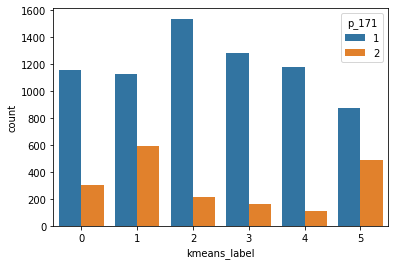

In [22]:
#p_171	La unidad de vivienda cuenta con servicios públicos de:  Gas natural (red)
consultar_dicc('p_171')
ax = sns.countplot(x="kmeans_label", hue="p_171", data=dff)

    pregunta  codigo   etiqueta
333     p_10       1  Estrato 1
334     p_10       2  Estrato 2
335     p_10       3  Estrato 3
336     p_10       4  Estrato 4
337     p_10       5  Estrato 5
338     p_10       6  Estrato 6


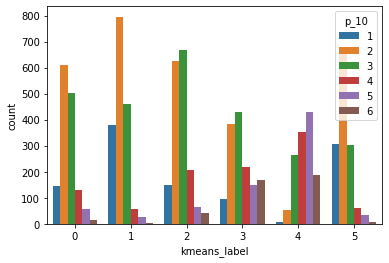

In [23]:
#p_10	Estrato de la Vivienda
consultar_dicc('p_10')
ax = sns.countplot(x="kmeans_label", hue="p_10", data=dff)

  pregunta  codigo               etiqueta
0      p_5       1       Cabecera -Urbana
1      p_5       2  Centro poblado- Rural
2      p_5       3  Rural disperso- Rural


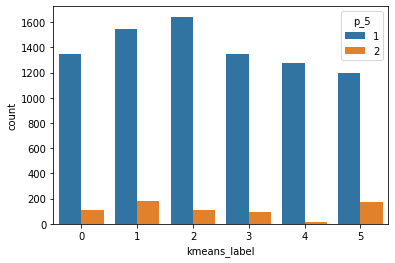

In [27]:
#p_5	Zona
consultar_dicc('p_5')
ax = sns.countplot(x="kmeans_label", hue="p_5", data=dff)

     pregunta  codigo                       etiqueta
3626    p_146       1  Rancho o vivienda de desechos
3627    p_146       2                      Cuarto(s)
3628    p_146       3         Cuartos en inquilinato
3629    p_146       4                    Apartamento
3630    p_146       5                           Casa


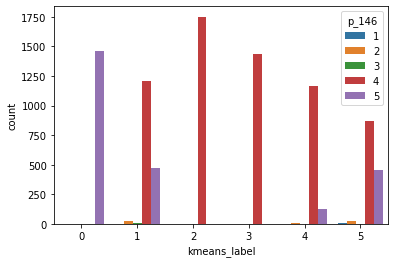

In [26]:
#p_146	Tipo de Vivienda
consultar_dicc('p_146')
ax = sns.countplot(x="kmeans_label", hue="p_146", data=dff)

Gráfica de los datos en 3 coordenadas

In [ ]:
famd_df['kmeans_label']=kmeans.labels_
#famd_df.to_csv('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Data/Other/R3-K-means-FAMD.csv', sep=';')

In [ ]:
dfcol = pd.DataFrame()
dfcol['kmeans_label']=pd.Categorical(famd_df['kmeans_label'])
my_color=dfcol['kmeans_label'].cat.codes

In [ ]:
c_1 =np.array(famd_df)
x1 = c_1[:,0]
y1 = c_1[:,1]
z1 = c_1[:,2]

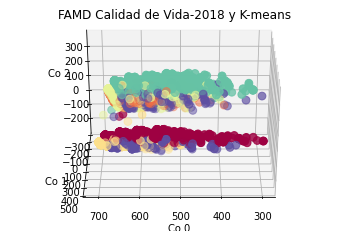

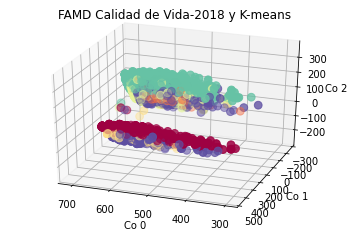

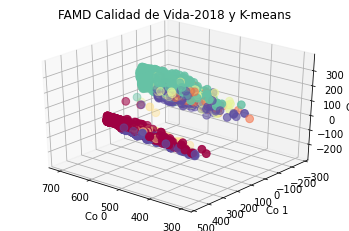

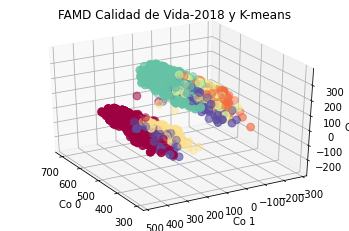

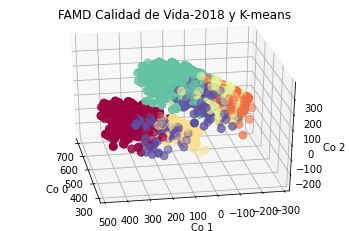

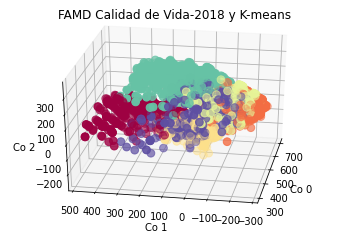

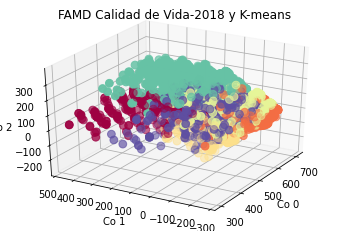

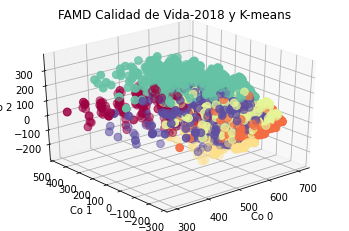

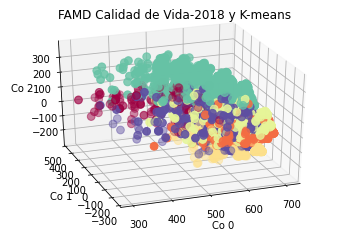

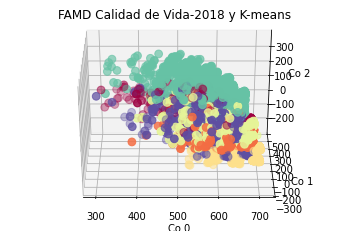

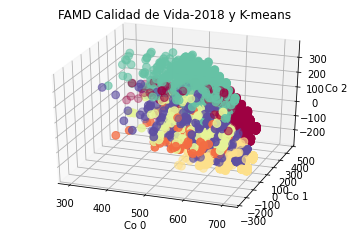

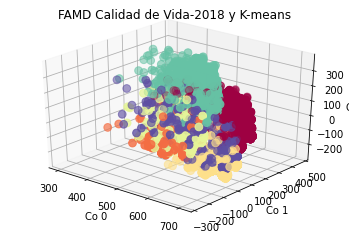

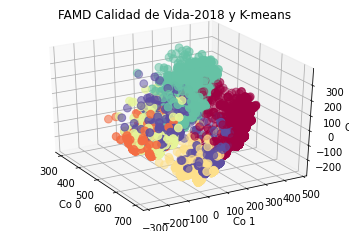

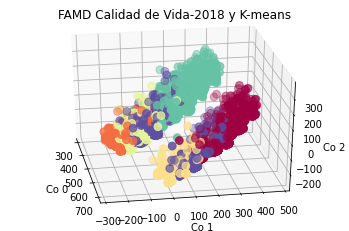

In [ ]:
for angle in range(90,370,20):
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1,  c=my_color+5, cmap="Spectral_r", s=60)
    #ax.scatter(x2, y2, z2, c='r', cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
   # xAxisLine = ((min(x1), max(x1)), (0, 0), (0,0))
   # ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
   # yAxisLine = ((0, 0), (min(y1), max(y1)), (0,0))
   # ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
   # zAxisLine = ((0, 0), (0,0), (min(z1), max(z1)))
   # ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
    
    ax.view_init(30,angle)

    # label the axes
    ax.set_xlabel("Co 0")
    ax.set_ylabel("Co 1")
    ax.set_zlabel("Co 2")
    ax.set_title("FAMD Calidad de Vida-2018 y K-means")
    filename= '/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/k-means/'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)



In [ ]:
import os
import imageio
def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 0.25
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path) 
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)

In [ ]:
make_gif('/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/k-means', '/content/gdrive/My Drive/calidad_de_vida_medellin/github/Code/Modeling/3D-graphs/k-means.gif') 